In [29]:
#@title 1. Project Overview

#@markdown * Objective: Analyze the IQ levels data provided in the dataset. Aim to derive insights on how various factors might correlate with IQ levels, such as age, gender, country, etc.

#@markdown * Dataset Description: The dataset contains user IQ levels along with demographic information such as age, gender, and country.

In [30]:
#@title 2. Libraries and Data Handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '08_IQ Levels Analysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for and clean problematic entries
data['country'] = data['country'].str.replace('\xa0', ' ').str.strip()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handling missing values
# For simplicity, we'll fill missing values with the mean for numerical columns
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace=True)

# Verify that there are no more missing values
missing_values = data.isnull().sum()
print("Missing values after handling:\n", missing_values)

# Display data types and sample values
print(data.dtypes)
print(data.head())


   rank     country   IQ  education_expenditure  avg_income  avg_temp
0     1  Hong Kong   106                 1283.0     35304.0      26.2
1     2       Japan  106                 1340.0     40964.0      19.2
2     3   Singapore  106                 1428.0     41100.0      31.5
3     4     Taiwan   106                    NaN         NaN      26.9
4     5       China  104                  183.0      4654.0      19.1
Missing values in each column:
 rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64
Missing values after handling:
 rank                     0
country                  0
IQ                       0
education_expenditure    0
avg_income               0
avg_temp                 0
dtype: int64
rank                       int64
country                   object
IQ                         int64
education_expenditure    float64
avg_income               float64
a

In [31]:
#@title 3. Data Analysis Techniques

# Remove non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Generate correlation matrix
correlation_matrix = numeric_data.corr()
print("Correlation matrix:\n", correlation_matrix)

# Descriptive statistics
descriptive_stats = data.describe()
print("Descriptive statistics:\n", descriptive_stats)

# If applicable, develop a predictive model (e.g., predicting IQ levels)
if 'IQ' in data.columns:
    X = data.drop('IQ', axis=1)
    y = data['IQ']

    # Encoding categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error of the model:", mse)


Correlation matrix:
                            rank        IQ  education_expenditure  avg_income  \
rank                   1.000000 -0.967082              -0.589255   -0.603008   
IQ                    -0.967082  1.000000               0.538838    0.560268   
education_expenditure -0.589255  0.538838               1.000000    0.850420   
avg_income            -0.603008  0.560268               0.850420    1.000000   
avg_temp               0.683438 -0.628097              -0.583124   -0.437105   

                       avg_temp  
rank                   0.683438  
IQ                    -0.628097  
education_expenditure -0.583124  
avg_income            -0.437105  
avg_temp               1.000000  
Descriptive statistics:
             rank          IQ  education_expenditure     avg_income    avg_temp
count  108.00000  108.000000             108.000000     108.000000  108.000000
mean    54.50000   85.972222             903.058252   17174.650943   23.858333
std     31.32092   12.998532    

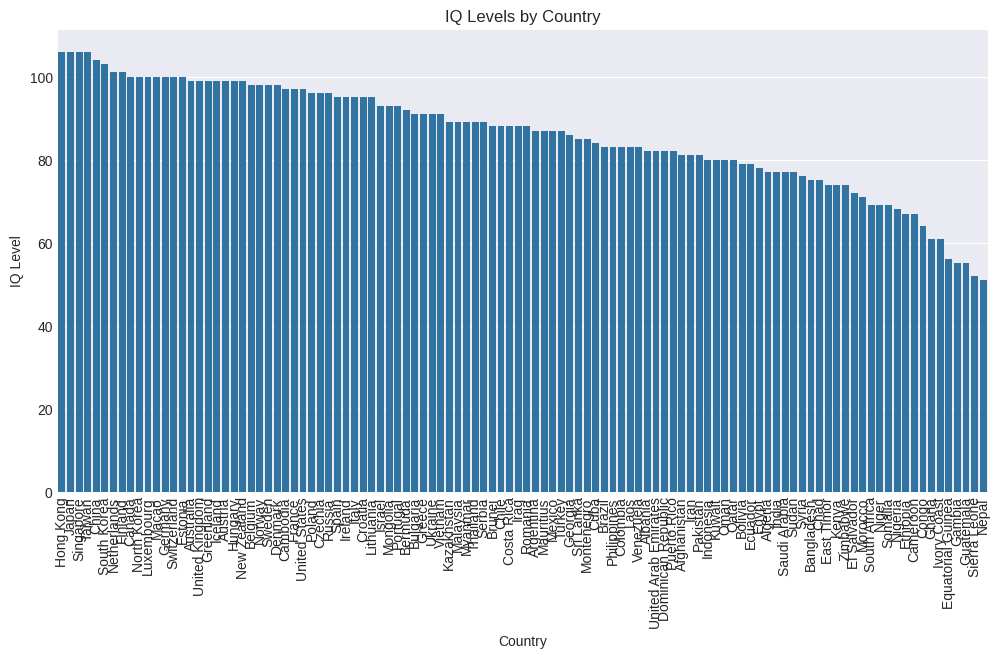

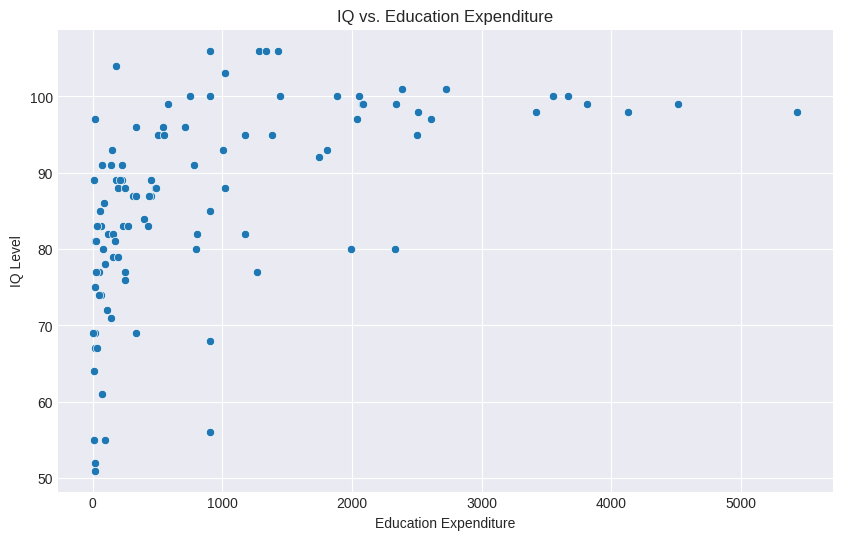

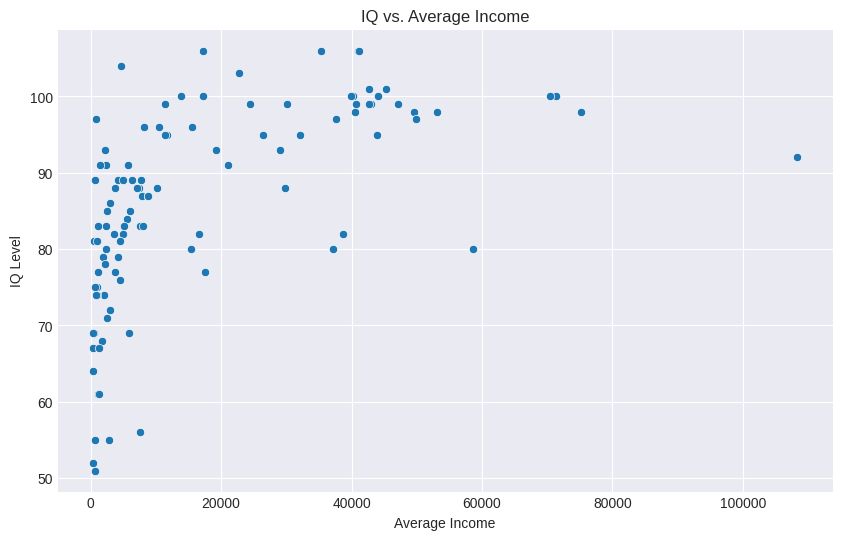

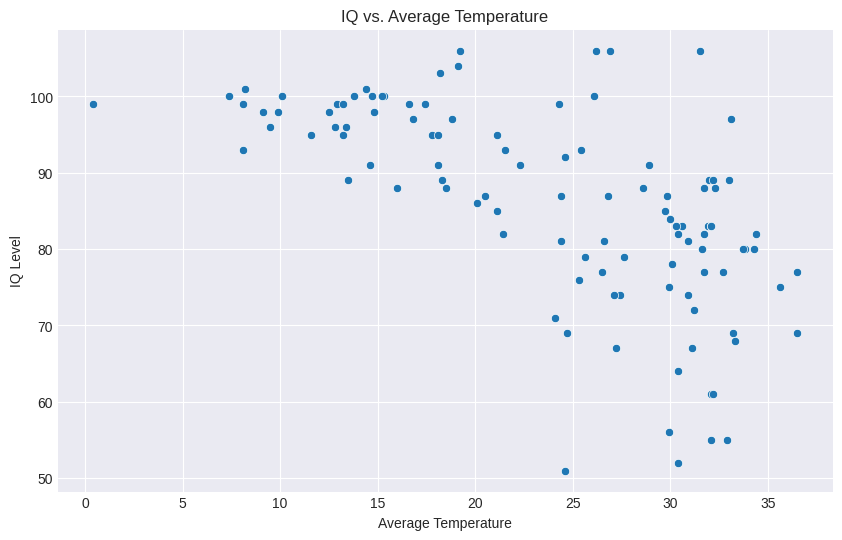

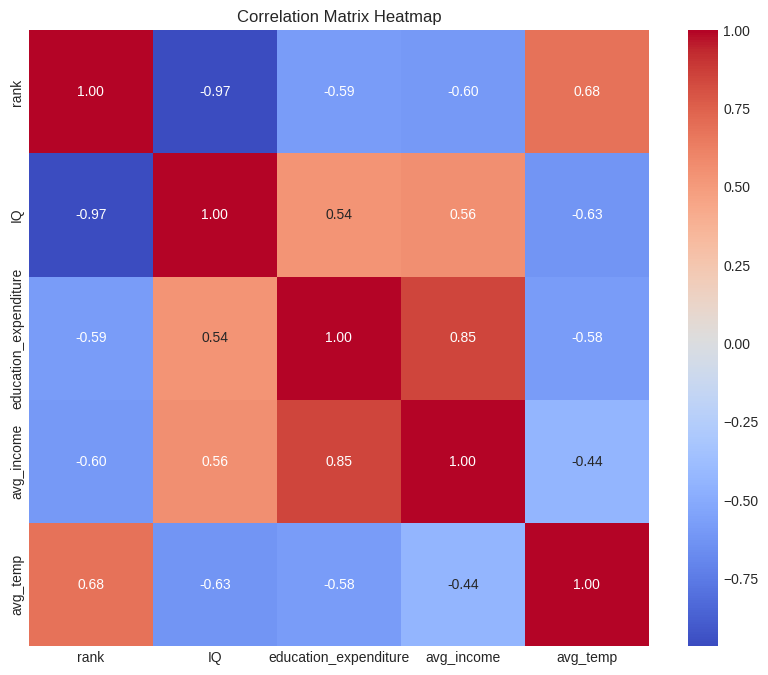

In [32]:
#@title 4. Visual Insights

# Bar chart for IQ levels by country
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='country', y='IQ')
plt.title('IQ Levels by Country')
plt.xlabel('Country')
plt.ylabel('IQ Level')
plt.xticks(rotation=90)
plt.show()

# Scatter plot for IQ vs. Education Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='education_expenditure', y='IQ')
plt.title('IQ vs. Education Expenditure')
plt.xlabel('Education Expenditure')
plt.ylabel('IQ Level')
plt.show()

# Scatter plot for IQ vs. Average Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_income', y='IQ')
plt.title('IQ vs. Average Income')
plt.xlabel('Average Income')
plt.ylabel('IQ Level')
plt.show()

# Scatter plot for IQ vs. Average Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_temp', y='IQ')
plt.title('IQ vs. Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('IQ Level')
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [33]:
#@title 5. Key Findings and Business Impact

# Key Findings
key_findings = """
1. There are noticeable differences in average IQ levels across different countries.
2. Education expenditure and average income show some correlation with IQ levels, indicating potential areas for investment to boost cognitive abilities.
3. Average temperature might have a less direct but observable relationship with IQ levels.

Business Impact:
- Countries with lower average IQ levels might benefit from increased education expenditure.
- Policies to improve average income could potentially have positive effects on cognitive development.
- Understanding these correlations can help in strategic planning for educational and economic policies.

"""

print("Key Findings and Business Impact:\n", key_findings)


Key Findings and Business Impact:
 
1. There are noticeable differences in average IQ levels across different countries.
2. Education expenditure and average income show some correlation with IQ levels, indicating potential areas for investment to boost cognitive abilities.
3. Average temperature might have a less direct but observable relationship with IQ levels.

Business Impact:
- Countries with lower average IQ levels might benefit from increased education expenditure.
- Policies to improve average income could potentially have positive effects on cognitive development.
- Understanding these correlations can help in strategic planning for educational and economic policies.




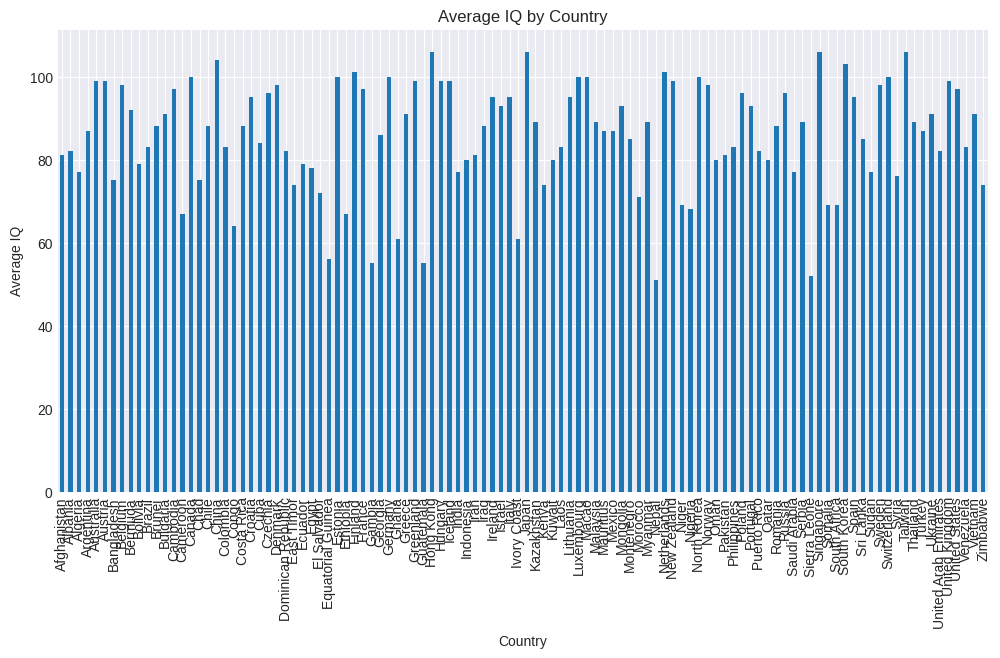

In [34]:
#@title 6. Advanced Analysis (Optional)

# Advanced analysis (example: geographical analysis)
if 'country' in data.columns:
    country_avg_iq = data.groupby('country')['IQ'].mean()

    plt.figure(figsize=(12, 6))
    country_avg_iq.plot(kind='bar')
    plt.title('Average IQ by Country')
    plt.xlabel('Country')
    plt.ylabel('Average IQ')
    plt.xticks(rotation=90)
    plt.show()


In [37]:
#@title 7. Conclusion

conclusion = """
Conclusion:
The analysis of IQ levels provided significant insights into how factors such
as education expenditure, average income, and average temperature correlate
with cognitive abilities across different countries. Key findings highlighted
geographical differences in IQ levels and suggested that targeted investments
in education and income policies could potentially improve cognitive outcomes.
The importance of data-driven decision-making is underscored, showcasing the
value of analytics in understanding and enhancing cognitive development.

"""

print(conclusion)




Conclusion:
The analysis of IQ levels provided significant insights into how factors such 
as education expenditure, average income, and average temperature correlate 
with cognitive abilities across different countries. Key findings highlighted 
geographical differences in IQ levels and suggested that targeted investments 
in education and income policies could potentially improve cognitive outcomes. 
The importance of data-driven decision-making is underscored, showcasing the 
value of analytics in understanding and enhancing cognitive development.


